In [ ]:
import cml.data_v1 as cmldata

# Sample in-code customization of spark configurations
#from pyspark import SparkContext
#SparkContext.setSystemProperty('spark.executor.cores', '1')
#SparkContext.setSystemProperty('spark.executor.memory', '2g')

CONNECTION_NAME = "go01-aw-dl"
conn = cmldata.get_connection(CONNECTION_NAME)
spark = conn.get_spark_session()

# Sample usage to run query through spark
EXAMPLE_SQL_QUERY = "show databases"
spark.sql(EXAMPLE_SQL_QUERY).show()


# **DATASET**

* **ID : Unique Identifier for a row** 

* **Gender: Gender of the Customer** 

* **Age : Age of the Customer (in Years)**

* **Region_Code : Code of the Region for the customers** 

* **Occupation : Occupation Type for the customer** 

* **Channel_Code : Acquisition Channel Code for the Customer (Encoded)** 

* **Vintage : Vintage for the Customer (In Months), Number of Days, Customer has been associated with the company** 

* **Credit_Product : If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)** 

* **Avg_Account_Balance : Average Account Balance for the Customer in last 12 Months**

* **Is_Active : If the Customer is Active in last 3 Months** 

* **Is_Lead(Target) : If the Customer is interested for the Credit Card, 0 / 1: Customer is not interested / interested**

* **Things I have learned from this competition , please visit on this [topic](https://www.kaggle.com/discussion/242986) and provide your feedback**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [ ]:
import cml.data_v1 as cmldata

# Sample in-code customization of spark configurations
#from pyspark import SparkContext
#SparkContext.setSystemProperty('spark.executor.cores', '1')
#SparkContext.setSystemProperty('spark.executor.memory', '2g')

CONNECTION_NAME = "go01-aw-dl"
conn = cmldata.get_connection(CONNECTION_NAME)
spark = conn.get_spark_session()

# Sample usage to run query through spark
EXAMPLE_SQL_QUERY = "show databases"
spark.sql(EXAMPLE_SQL_QUERY).show()


In [3]:
df=pd.read_csv("../input/jobathon-may-2021-credit-card-lead-prediction/train.csv")

In [4]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


# **OVERVIEW**

In [13]:
print("***** Shape of dataset is *****")
print()
df.shape   #shape of training data

***** Shape of dataset is *****



(245725, 11)

In [14]:
print("***** Column names present in dataset *****")
print()
df.columns  #Column names

***** Column names present in dataset *****



Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [15]:
print("***** Checking if null values present or not *****")
print()
df.isnull().sum()   #Checking null values

***** Checking if null values present or not *****



ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [16]:
print("**** Description of data *****")
print()
df.describe()   #Description of data

**** Description of data *****



,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [17]:
print("***** Value counts of target feature *****")
print()
df['Is_Lead'].value_counts()

***** Value counts of target feature *****



0    187437
1     58288
Name: Is_Lead, dtype: int64

In [22]:
columns=[ 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
        'Credit_Product', 'Is_Active','Is_Lead']

for i in columns:
    print("Value counts of",i,"is :")
    print(df[i].value_counts())
    print()
    print("Unique values of",i,"is :",df[i].unique()) 
    print()

Value counts of Gender is :
Male      134197
Female    111528
Name: Gender, dtype: int64

Unique values of Gender is : ['Female' 'Male']

Value counts of Region_Code is :
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

Unique values of Region_Code is : ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' '

# **VISUALIZATIONS**

In [11]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


### **As we can see data is imbalanced**

In [23]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=14)
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=14)


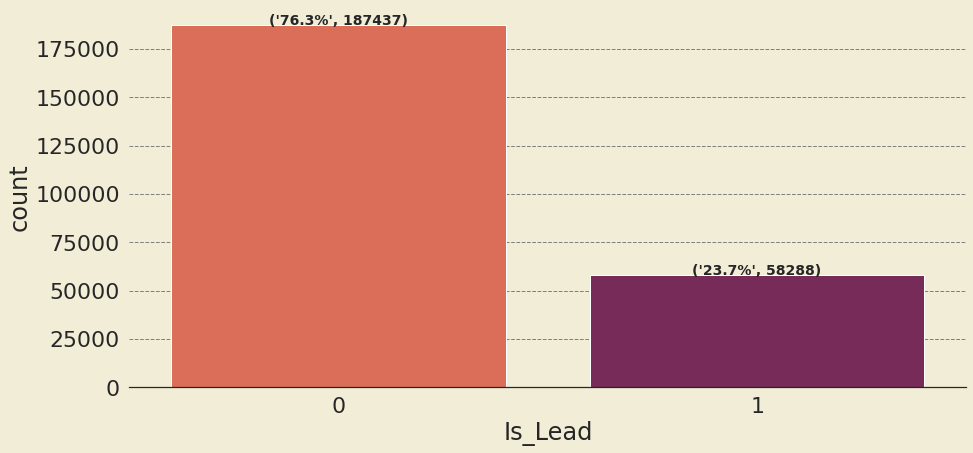

In [24]:
sns.set_theme(context="notebook",style="white",font_scale=2)
fig=plt.figure(figsize=(15,7))

#Setting plot and background color
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

#Dealing with spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')

a=sns.countplot(data=df,x='Is_Lead',palette='rocket_r')
without_hue(df,'Is_Lead',a)

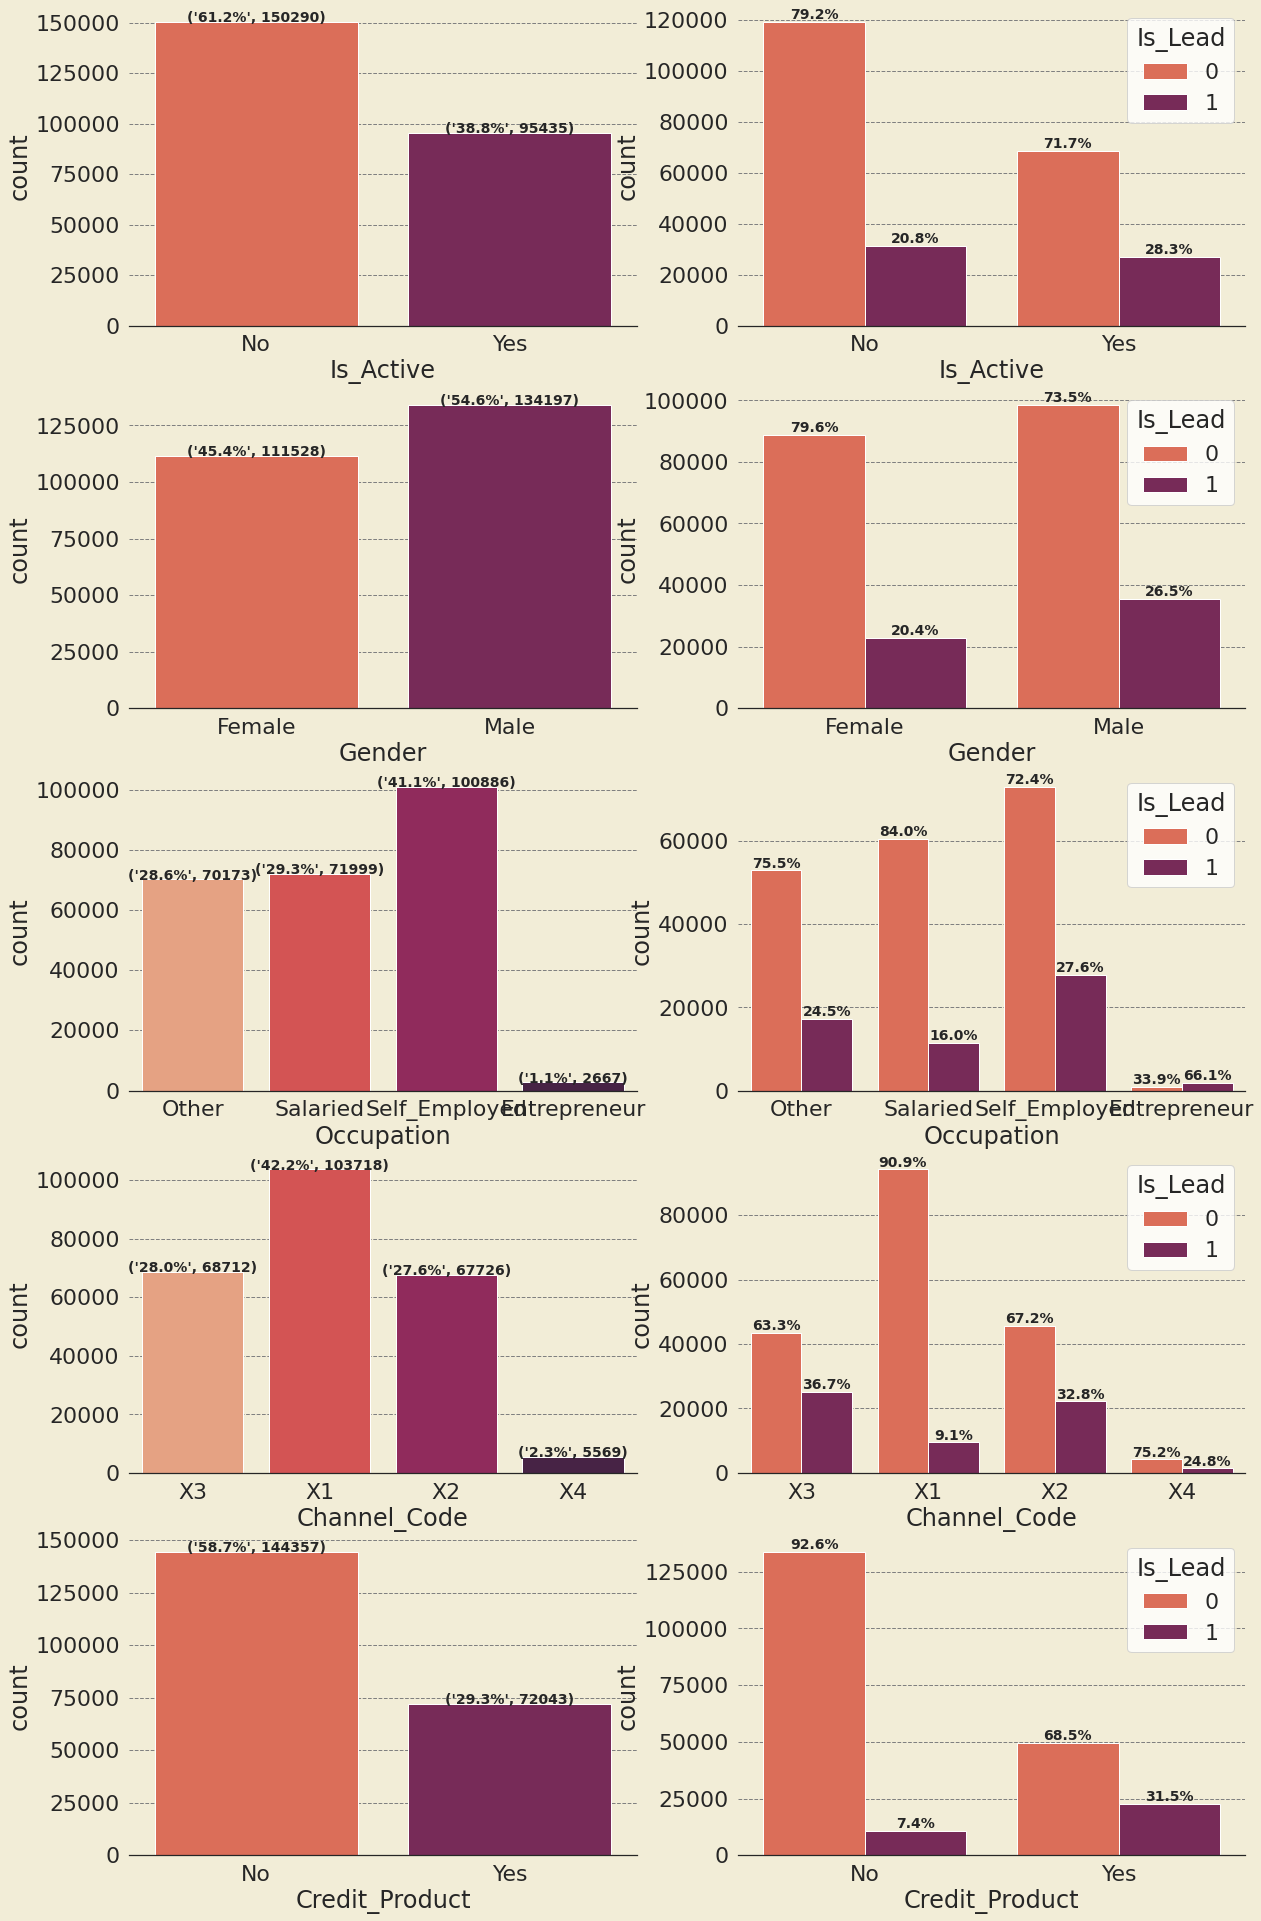

In [26]:
nrows=5
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,34))
columns=['Gender','Occupation', 'Channel_Code','Credit_Product', 'Is_Active']

f.patch.set_facecolor('#F2EDD7FF')

    #Setting background and foreground color
for i in range(0,nrows):
  for j in range(0,ncols):
    ax[i][j].set_facecolor('#F2EDD7FF')
    ax[i][j].spines['top'].set_visible(False)
    ax[i][j].spines['right'].set_visible(False)
    ax[i][j].spines['left'].set_visible(False)
    ax[i][j].grid(linestyle="--",axis='y',color='gray')


    if(j==0):
      a1=sns.countplot(data=df,x=columns[i-1],palette='rocket_r',ax=ax[i][j])
      without_hue(df,columns[i-1],a1)
    elif(j==1):
      a2=sns.countplot(data=df,x=columns[i-1],palette='rocket_r',ax=ax[i][j],hue="Is_Lead")
      with_hue(df,columns[i-1],a2)



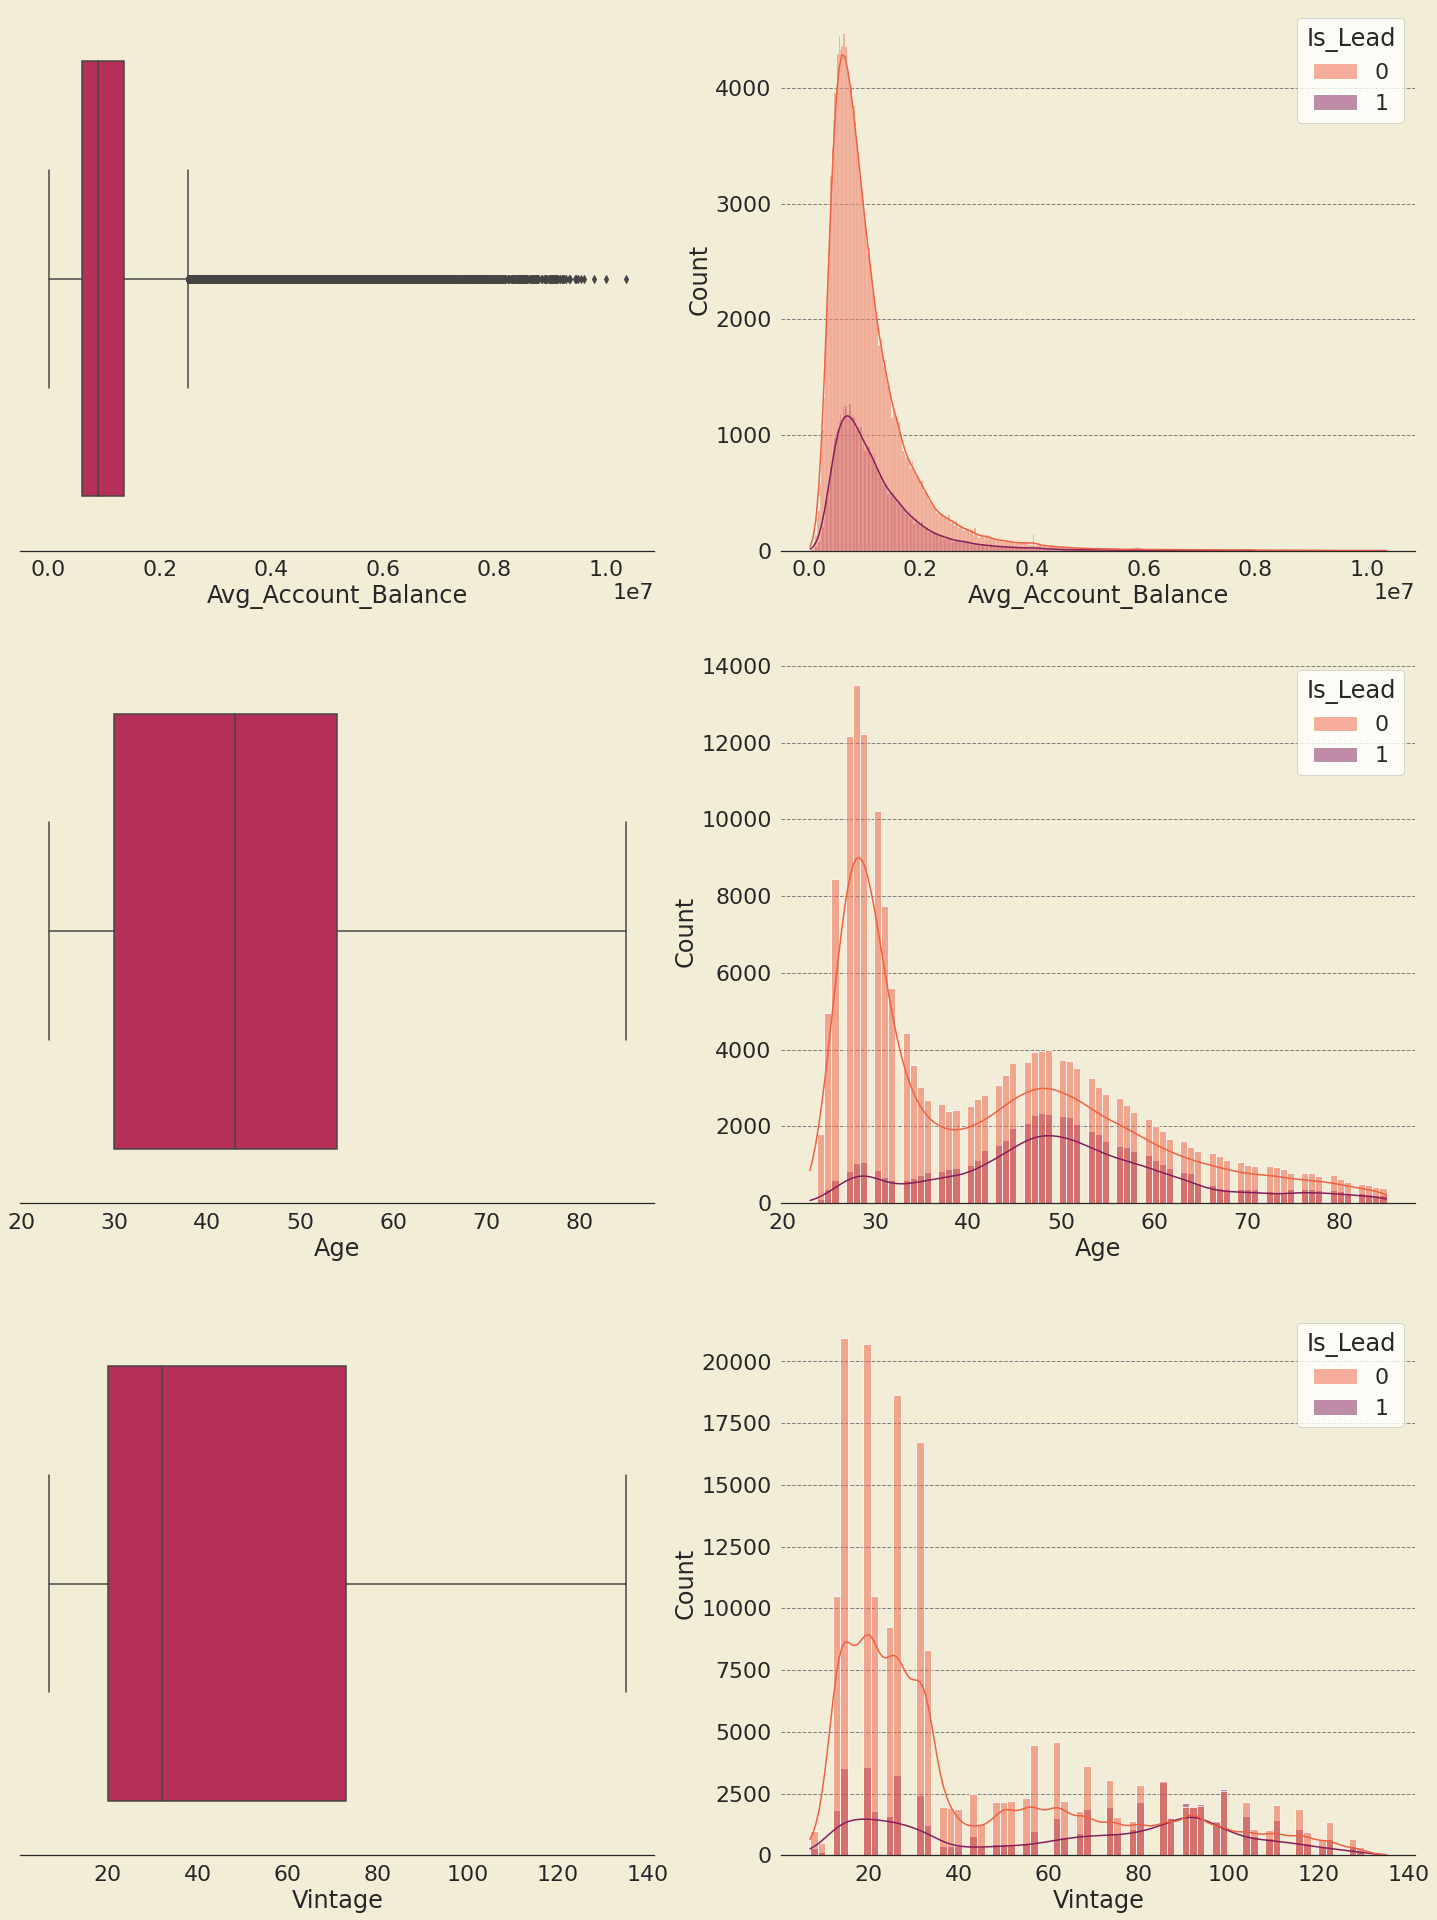

In [28]:
nrows=3
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(25,34))
columns=["Age","Vintage","Avg_Account_Balance"]

f.patch.set_facecolor('#F2EDD7FF')

    #Setting background and foreground color
for i in range(0,nrows):
  for j in range(0,ncols):
    ax[i][j].set_facecolor('#F2EDD7FF')
    ax[i][j].spines['top'].set_visible(False)
    ax[i][j].spines['right'].set_visible(False)
    ax[i][j].spines['left'].set_visible(False)
    ax[i][j].grid(linestyle="--",axis='y',color='gray')


    if(j==0):
      a1=sns.boxplot(data=df,x=(df[columns[i-1]]),palette='rocket_r',ax=ax[i][j])
    elif(j==1):
      a2=sns.histplot(data=df,x=(df[columns[i-1]]),palette='rocket_r',ax=ax[i][j],hue="Is_Lead",kde=True)

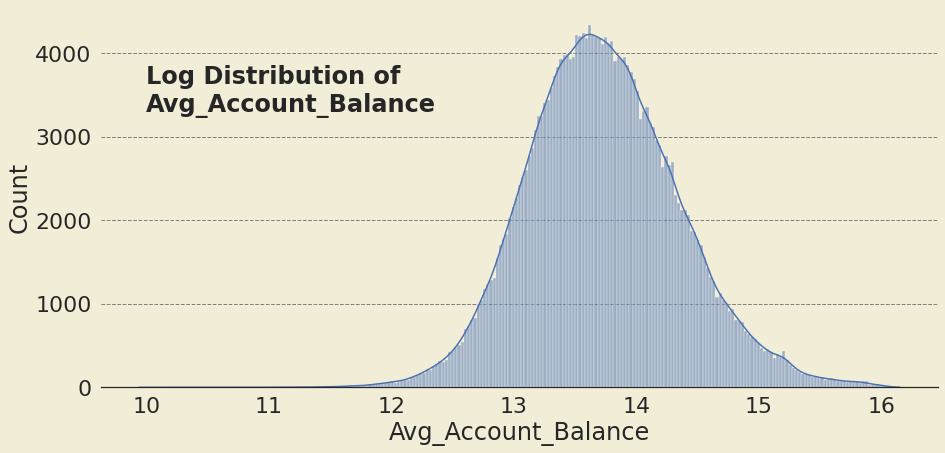

In [32]:
sns.set_theme(context="notebook",style="white",font_scale=2)
fig=plt.figure(figsize=(15,7))

#Setting plot and background color
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

#Dealing with spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')

plt.text(10,3300,"Log Distribution of\nAvg_Account_Balance",fontweight='bold')
a=sns.histplot(data=df,x=np.log(df['Avg_Account_Balance']),palette='rocket_r',kde=True)


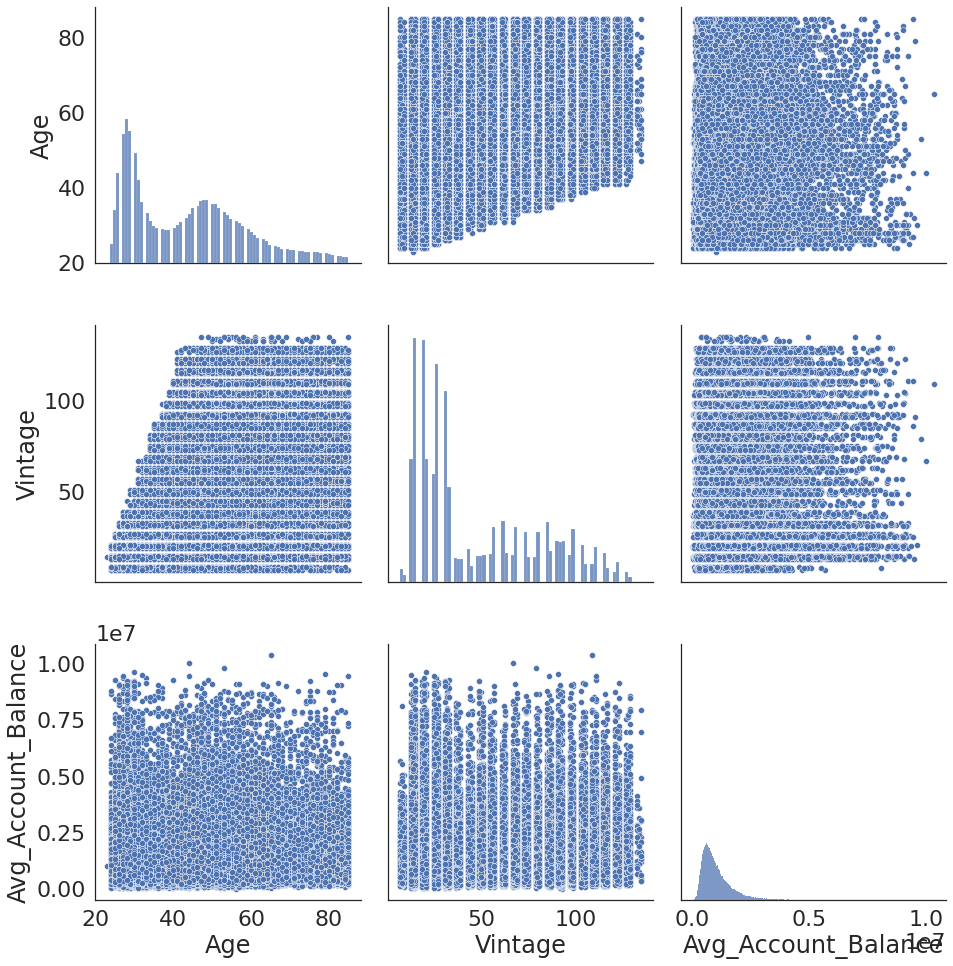

In [41]:
xvars=['Age',"Vintage",'Avg_Account_Balance']
yvars=['Age','Vintage',"Avg_Account_Balance"]
g=sns.pairplot(data=df,x_vars=xvars,y_vars=yvars,palette="rocket_r")
g.fig.set_size_inches(15,15)


# **PREPROCESSING**

In [42]:
#Changing the distribution of 'Avg_Account_Balance' into Log Distribution
df['Avg_Account_Balance']=np.log(df['Avg_Account_Balance'])

#### **Removing outliers using quartile method**

In [ ]:

'''df_acc=sorted(df['Avg_Account_Balance'])
Q1,Q3=np.percentile(df_acc,[25,75])
IQR= Q3-Q1
lower_range= Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

print("Lower range of outliers : ",lower_range)
print("Upper range of outliers : ",upper_range)
df_lower_outliers=df[df['Avg_Account_Balance']<lower_range]
df_upper_outliers=df[df['Avg_Account_Balance']>upper_range]

print("***** Lower outliers of acc *****")
print()
df_lower_outliers

print(df_upper_outliers.shape)
print()
print("**** Outer outliers of acc *****")
print()
df_upper_outliers

df1=df.drop(df[df['Avg_Account_Balance']>upper_range].index)
df1=df.drop(df[df['Avg_Account_Balance']<lower_range].index)'''

##### **Curently going forward without dropping outliers : because removing outliers may cause loss of important data**

In [43]:
df1=df.copy()

##### **Dropping "ID" Column**

In [44]:
dropping_columns=['ID']
df1=df1.drop(dropping_columns,axis=1)

#### **Importing necessary libraries**

In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import optuna
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score,train_test_split , StratifiedKFold
from sklearn.metrics import roc_auc_score , f1_score , confusion_matrix , classification_report

##### **We will take "nan" value present in "Credit_Product" as another class and replace all "nan" values with "Missing" Keyword**

In [46]:
#df1["Credit_Product"]=df1['Credit_Product'].fillna(df1['Credit_Product'].dropna().mode()[0])
df1['Credit_Product'].replace(np.nan,'Missing',inplace=True)

##### **Will do label encoding of all categorical columns**

In [47]:
#Label Encoding
label_encode=LabelEncoder()
columns1=['Gender', 'Is_Active','Occupation', 'Channel_Code','Credit_Product',"Region_Code"]
df1[columns1]=df1[columns1].apply(label_encode.fit_transform)
df1.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,1,13.860193,0,0
1,0,30,27,2,0,32,1,13.274205,0,0
2,0,56,18,3,2,26,1,14.210464,1,0
3,1,34,20,2,0,19,1,13.061453,0,0
4,0,30,32,2,0,33,1,13.695360,0,0


In [ ]:
#One hot encoding
label_encode=LabelEncoder()
columns1=['Gender', 'Is_Active']
columns2=['Occupation', 'Channel_Code','Credit_Product']
df1[columns1]=df1[columns1].apply(label_encode.fit_transform)
df1=pd.get_dummies(data=df1,columns=columns2)
df1.head()

In [ ]:
#Standard Scaling
ss=StandardScaler()
columns3=['Age','Vintage','Avg_Account_Balance']
df1[columns3]=ss.fit_transform(df1[columns3])
df1.head()

#### **Not any major correlation between two features so we will go ahead with all features and start from basic**

<AxesSubplot:>

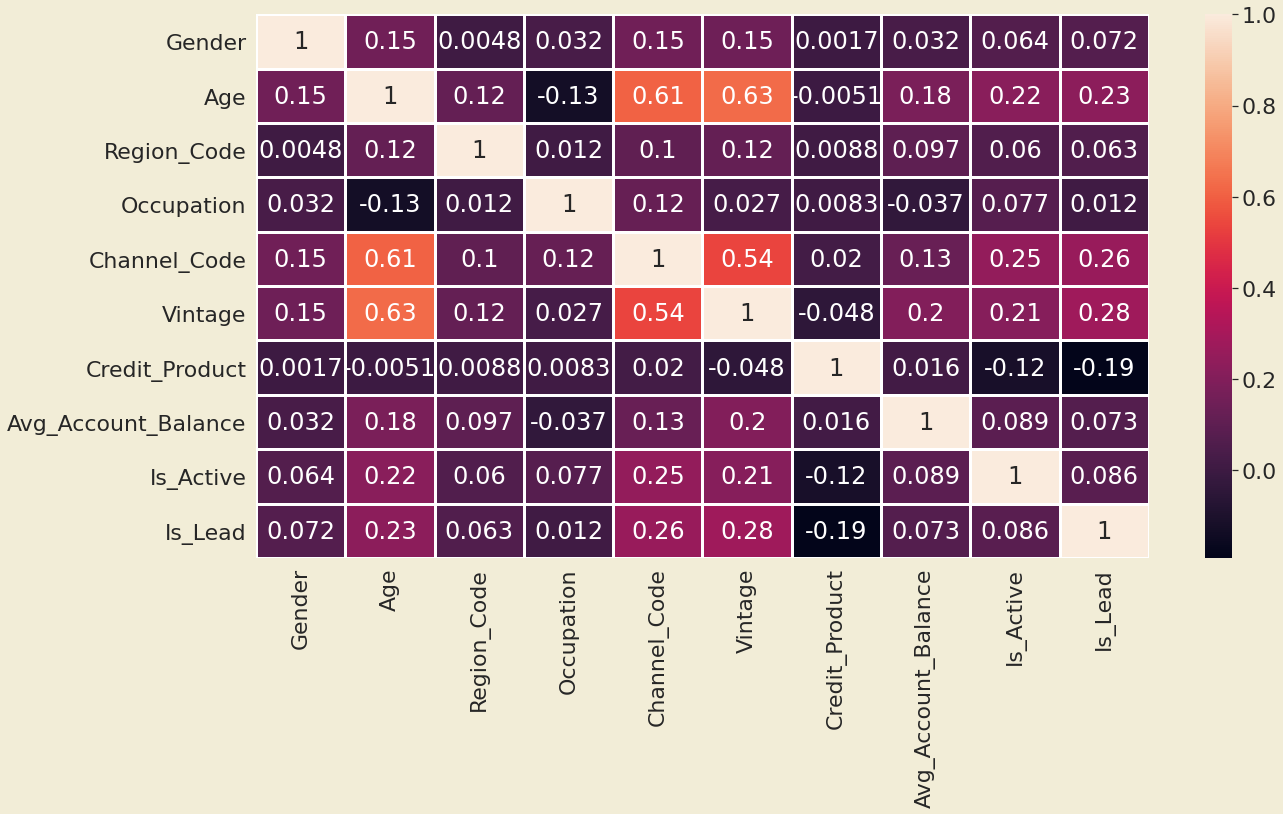

In [52]:
fig=plt.figure(figsize=(20,10))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

sns.heatmap(data=df1.corr(),annot=True,linewidth=3)

In [53]:
Y=df1['Is_Lead']
X=df1.drop("Is_Lead",axis=1)

In [54]:
Y.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [56]:
y_train.value_counts()

0    131177
1     40830
Name: Is_Lead, dtype: int64

In [57]:
y_test.value_counts()

0    56260
1    17458
Name: Is_Lead, dtype: int64

##### **Undersampling and oversampling code but we will move ahead without implementation of these techniques and observe how our models will work**

In [ ]:
#Oversampling
smt=SMOTE()
x_samp,y_samp=smt.fit_resample(x_train,y_train)

#UnderSampling
'''from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=42)


# **LOGISTIC REGRESSION**

In [59]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(solver="liblinear", random_state=42)
cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
ans=cross_val_score(clf,x_train,y_train,cv=cv,n_jobs=2,scoring='roc_auc').mean()
print("Logistic Regression :" , ans)

Logistic Regression : 0.7266488038717758


##### **Training of Model**

In [60]:
model_log=clf.fit(x_train,y_train)

##### **Prediction**

In [61]:
pred_log=model_log.predict_proba(x_test)[:,1]

In [62]:
print("***** roc-auc-score of logistic regression *****")
print()
print(roc_auc_score(y_test,pred_log))

***** roc-auc-score of logistic regression *****

0.7259528831309815


# **Decision Tree Classifier**

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
def objective(trial):
    
    #n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = int(trial.suggest_int('max_depth', 1,100))
    clf = DecisionTreeClassifier(max_depth=max_depth)
    cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
    return cross_val_score(clf, x_train, y_train,n_jobs=2, cv=cv,scoring='roc_auc').mean()

##### **Hyperparameter tuning using optuna**

In [65]:
study = optuna.create_study(direction='maximize',study_name='Decision Trees')
study.optimize(objective, n_trials=15)

[I 2021-06-01 06:51:30,202] A new study created in memory with name: Decision Trees
[I 2021-06-01 06:51:33,593] Trial 0 finished with value: 0.7047828939628411 and parameters: {'max_depth': 93}. Best is trial 0 with value: 0.7047828939628411.
[I 2021-06-01 06:51:37,023] Trial 1 finished with value: 0.7064660199403321 and parameters: {'max_depth': 70}. Best is trial 1 with value: 0.7064660199403321.
[I 2021-06-01 06:51:40,421] Trial 2 finished with value: 0.7060707591370932 and parameters: {'max_depth': 97}. Best is trial 1 with value: 0.7064660199403321.
[I 2021-06-01 06:51:43,743] Trial 3 finished with value: 0.7025536844800896 and parameters: {'max_depth': 38}. Best is trial 1 with value: 0.7064660199403321.
[I 2021-06-01 06:51:47,170] Trial 4 finished with value: 0.7052628211068912 and parameters: {'max_depth': 50}. Best is trial 1 with value: 0.7064660199403321.
[I 2021-06-01 06:51:50,562] Trial 5 finished with value: 0.706265379064688 and parameters: {'max_depth': 81}. Best is tri

In [66]:
trial = study.best_trial
print('## best_value -->',trial.value)
print("## best_parameters -->",trial.params)

## best_value --> 0.8624227400534721
## best_parameters --> {'max_depth': 10}


In [67]:
model_dt=DecisionTreeClassifier(max_depth=10)

model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [68]:
y_pred_dt=model_dt.predict_proba(x_test)[:,1]

In [71]:
print("***** roc_auc_score of decision tree classifier *****")
print()
print(roc_auc_score(y_test,y_pred_dt))

***** roc_auc_score of decision tree classifier *****

0.8642772724112803


# **K NEAREST NEIGHBOURS**

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
def objective(trial):
    
    #n_estimators = trial.suggest_int('n_estimators', 2, 200)
    n_neighbors = int(trial.suggest_int('n_neighbors', 1,500))
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

    return cross_val_score(clf, x_train, y_train, 
           n_jobs=2, cv=cv,scoring='roc_auc').mean()

In [74]:
study = optuna.create_study(direction='maximize',study_name='KNN')
study.optimize(objective, n_trials=15)

[I 2021-06-01 06:53:51,391] A new study created in memory with name: KNN
[I 2021-06-01 06:54:18,296] Trial 0 finished with value: 0.7454042030151251 and parameters: {'n_neighbors': 434}. Best is trial 0 with value: 0.7454042030151251.
[I 2021-06-01 06:54:34,413] Trial 1 finished with value: 0.748036127244341 and parameters: {'n_neighbors': 208}. Best is trial 1 with value: 0.748036127244341.
[I 2021-06-01 06:54:43,858] Trial 2 finished with value: 0.7540302001901276 and parameters: {'n_neighbors': 89}. Best is trial 2 with value: 0.7540302001901276.
[I 2021-06-01 06:54:57,515] Trial 3 finished with value: 0.7491709420481937 and parameters: {'n_neighbors': 173}. Best is trial 2 with value: 0.7540302001901276.
[I 2021-06-01 06:55:24,794] Trial 4 finished with value: 0.7453509403629701 and parameters: {'n_neighbors': 439}. Best is trial 2 with value: 0.7540302001901276.
[I 2021-06-01 06:55:41,515] Trial 5 finished with value: 0.7476654530013924 and parameters: {'n_neighbors': 227}. Best i

In [75]:
trial = study.best_trial
print('## best_values -->',trial.value)
print("## best_parameters -->",trial.params)

## best_values --> 0.7586378512079188
## best_parameters --> {'n_neighbors': 43}


In [76]:
model_k=KNeighborsClassifier(n_neighbors=43)

In [77]:
model_k.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=43)

In [78]:
y_pred_k=model_k.predict_proba(x_test)[:,1]

In [79]:
print(roc_auc_score(y_test,y_pred_k))

0.760652827972447


# **RANDOM FOREST CLASSIFIER**

In [80]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = int(trial.suggest_int('max_depth', 1, 40))
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

    return cross_val_score(clf, x_train, y_train, 
           n_jobs=2, cv=cv,scoring='roc_auc').mean()

In [81]:
study = optuna.create_study(direction='maximize',study_name='Random Forest')
study.optimize(objective, n_trials=10)

[I 2021-06-01 06:58:01,948] A new study created in memory with name: Random Forest
[I 2021-06-01 06:58:09,797] Trial 0 finished with value: 0.8669158236084149 and parameters: {'n_estimators': 12, 'max_depth': 15}. Best is trial 0 with value: 0.8669158236084149.
[I 2021-06-01 06:59:06,146] Trial 1 finished with value: 0.872158624162639 and parameters: {'n_estimators': 95, 'max_depth': 14}. Best is trial 1 with value: 0.872158624162639.
[I 2021-06-01 06:59:35,046] Trial 2 finished with value: 0.8524203128242498 and parameters: {'n_estimators': 36, 'max_depth': 39}. Best is trial 1 with value: 0.872158624162639.
[I 2021-06-01 07:00:35,419] Trial 3 finished with value: 0.864565290270396 and parameters: {'n_estimators': 82, 'max_depth': 20}. Best is trial 1 with value: 0.872158624162639.
[I 2021-06-01 07:00:43,274] Trial 4 finished with value: 0.836138892520216 and parameters: {'n_estimators': 10, 'max_depth': 30}. Best is trial 1 with value: 0.872158624162639.
[I 2021-06-01 07:01:55,775] T

In [82]:
trial = study.best_trial
print('## best_values -->',trial.value)
print("## best_parameters -->",trial.params)

## best_values --> 0.8730218888478415
## best_parameters --> {'n_estimators': 174, 'max_depth': 10}


In [83]:
model_rf=RandomForestClassifier(n_estimators=174,max_depth=10)

In [84]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=174)

In [85]:
pred_train=model_rf.predict_proba(x_test)[:,1]


In [86]:
print(roc_auc_score(y_test,pred_train))

0.8703769927415457


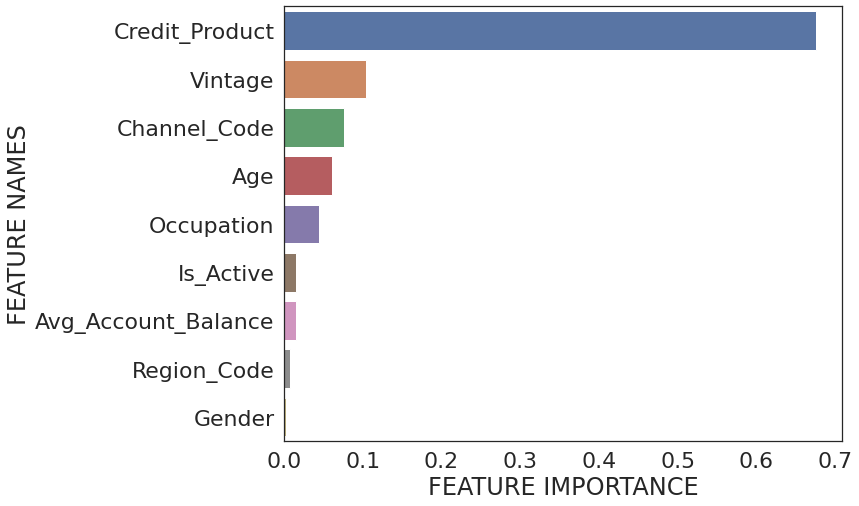

In [87]:
feature_importance = np.array(model_rf.feature_importances_)
feature_names = np.array(x_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
#plt.style.use("ggplot")
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

# **LGBM**

In [88]:
import lightgbm as lgb

In [89]:
def objective_lgbm(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 500)
    max_depth = int(trial.suggest_int('max_depth', 2, 50))
    learning_rate=trial.suggest_loguniform('learning_rate',0.001,1)
    colsample_bytree=trial.suggest_loguniform("colsample_bytree",0.1, 1)
    num_leaves=trial.suggest_int('num_leaves',10,300)
    reg_alpha= trial.suggest_loguniform('reg_alpha',0.1,10)
    reg_lambda= trial.suggest_loguniform('reg_lambda',0.1,10)
    min_split_gain=trial.suggest_loguniform('min_split_gain',0.1,1)
    subsample=trial.suggest_loguniform('subsample',0.1,1)    
    clf = lgb.LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth,
                            learning_rate=learning_rate,colsample_bytree=colsample_bytree,
                            num_leaves=num_leaves,reg_alpha=reg_alpha,reg_lambda=reg_lambda,
                            min_split_gain=min_split_gain,subsample=subsample)
    cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
    return cross_val_score(clf, x_train, y_train, 
           n_jobs=2, cv=5,scoring='roc_auc').mean()

In [90]:
study_lgbm= optuna.create_study(direction='maximize',study_name="LGBM")
study_lgbm.optimize(objective_lgbm, n_trials=15)

[I 2021-06-01 07:10:21,374] A new study created in memory with name: LGBM
[I 2021-06-01 07:10:26,801] Trial 0 finished with value: 0.8656069766183073 and parameters: {'n_estimators': 205, 'max_depth': 44, 'learning_rate': 0.13521328619615694, 'colsample_bytree': 0.15358270921191375, 'num_leaves': 167, 'reg_alpha': 2.6372979093747606, 'reg_lambda': 0.14999949514401972, 'min_split_gain': 0.10822955208441959, 'subsample': 0.10631163307452582}. Best is trial 0 with value: 0.8656069766183073.
[I 2021-06-01 07:10:36,896] Trial 1 finished with value: 0.8564985266750853 and parameters: {'n_estimators': 390, 'max_depth': 7, 'learning_rate': 0.016222573355087814, 'colsample_bytree': 0.12237975647122301, 'num_leaves': 167, 'reg_alpha': 0.7430662441361754, 'reg_lambda': 0.14744365989946356, 'min_split_gain': 0.10754016622282637, 'subsample': 0.16644467089465126}. Best is trial 0 with value: 0.8656069766183073.
[I 2021-06-01 07:10:54,323] Trial 2 finished with value: 0.8724475613634212 and paramete

In [91]:
trial_lgbm= study_lgbm.best_trial
print("## Accuracy --> ",trial_lgbm.value)
print("## Best parameters --> ",trial_lgbm.params)

## Accuracy -->  0.8733964621666267
## Best parameters -->  {'n_estimators': 293, 'max_depth': 32, 'learning_rate': 0.03960145822430867, 'colsample_bytree': 0.5690339893610459, 'num_leaves': 288, 'reg_alpha': 0.14664026311911862, 'reg_lambda': 6.29356761739946, 'min_split_gain': 0.35661395265448326, 'subsample': 0.26361826281903616}


In [92]:
#MODEL
model_lgbm=lgb.LGBMClassifier(**trial_lgbm.params)
model_lgbm.fit(x_train,y_train,eval_metric="auc",eval_set=[(x_test,y_test)],early_stopping_rounds=100,verbose=400)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[143]	valid_0's auc: 0.871349	valid_0's binary_logloss: 0.347422


LGBMClassifier(colsample_bytree=0.5690339893610459,
               learning_rate=0.03960145822430867, max_depth=32,
               min_split_gain=0.35661395265448326, n_estimators=293,
               num_leaves=288, reg_alpha=0.14664026311911862,
               reg_lambda=6.29356761739946, subsample=0.26361826281903616)

In [93]:
pred_lgbm=model_lgbm.predict_proba(x_test)[:,1]

In [95]:
print("***** roc_auc_score of LGBM *****")
print()
print(roc_auc_score(y_test,pred_lgbm))

***** roc_auc_score of LGBM *****

0.8713490748626016


### **Out of all classifiers LGBM gives the highest roc_auc_score**
### **If you have any suggestion please tell me in the comment section**
### **There are many experiments we can do on this dataset but I build a baseline notebook:)**
### **Also I have made a topic on things I have learned from this competition link is [Here](https://www.kaggle.com/discussion/242986) , please have a look and share your feedback**


### **Don't forget to visit my other notebooks too and your feedback is appreciated**

1. [Crime Against Women in India](https://www.kaggle.com/aryanml007/crime-against-women-in-india-2001-to-2014)
2. [Stroke Prediction Analysis](https://www.kaggle.com/aryanml007/stroke-prediction-analysis-auc-0-90)
3. [Heart Attack Analysis](https://www.kaggle.com/aryanml007/heart-attack-analysis-visualizations)

4. [TPS April 2021](https://www.kaggle.com/aryanml007/manual-encoding-optuna-tps-april)

5. [Fetal Health classification](https://www.kaggle.com/aryanml007/fetal-health-classification)

6. [Student performance analysis](https://www.kaggle.com/aryanml007/students-performance-analysis)

7. [Plant Disease detection](https://www.kaggle.com/aryanml007/plant-disease-resnet50)

8. [Vehicle Insurance](https://www.kaggle.com/aryanml007/vehicle-insurance)


In [ ]:
def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        #print("-"*50)
    
    return alg

In [ ]:
 lgbm_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

In [ ]:
from lightgbm import LGBMClassifier
lgb_model = cross_val(X,Y,LGBMClassifier, lgbm_params)